In [150]:
from vectors import *

In [151]:
B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)
v = (3,-2,5)

In [152]:
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

In [153]:
multiply_matrix_vector(B,v)

(1, -2, -2)

In [154]:
def matrix_multiply(a,b):
    if len(a[0]) != len(b):
        return "matrix size mismatch " + str(len(a[0])) + " != " + str(len(b))
    return tuple(
        tuple(dot(row,col) for col in zip(*b))
        for row in a
    )

In [155]:
a = ((1,1,0),(1,0,1),(1,-1,1))

In [156]:
b = ((0,2,1),(0,1,0),(1,0,-1))

In [157]:
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [158]:
def infer_matrix(n, transformation):
    def standard_base_vector(i):
        return tuple(1 if i==j else 0 for j in range(1,n+1))
    standard_basis = [standard_base_vector(i) for i in range(1,n+1)]
    cols = [transformation(v) for v in standard_basis]
    return tuple(zip(*cols))

In [159]:
from transforms import rotate_z_by
from math import pi

In [160]:
infer_matrix(3,rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

In [161]:
a = ((1.3,0.7),(6.5,3.2))

In [162]:
b = (-2.5,0.3)

In [163]:
(-2.5*1.3+0.3*-0.7,-2.5*6.5+0.3*3.2)

(-3.46, -15.29)

In [164]:
from random import randrange

In [165]:
def random_matrix(n):
    def create_matrix():
        return tuple(tuple(randrange(10) for _ in range(0,n)) for _ in range(0,n))
    a = create_matrix()
    b = create_matrix()
    print(a,b)
    return matrix_multiply(a,b)

In [166]:
random_matrix(3)

((2, 0, 9), (7, 5, 0), (9, 3, 4)) ((9, 8, 3), (8, 6, 4), (4, 2, 0))


((54, 34, 6), (103, 86, 41), (121, 98, 39))

In [167]:
def transform(v):
    m = ((2,1,1),(1,2,1),(1,1,2))
    return multiply_matrix_vector(m,v)

In [243]:
import os
os.environ['DISPLAY'] = ': 0.0'
os.environ["SDL_VIDEODRIVER"] = "dummy"
from draw_model import draw_model
from transforms import polygon_map
from teapot import load_triangles
draw_model(polygon_map(transform, load_triangles()))

error: OpenGL support is either not configured in SDL or not available in current SDL video driver (dummy) or platform

In [169]:
def multiply_matrix_vector(a,b):
    return tuple(
        sum(
            row[n]*b[n]
            for n in range(0,len(row))
        )
        for row in a
    )

In [170]:
a = ((1,2,3),(4,5,6),(7,8,9))

In [171]:
b = (2,4,6)

In [172]:
multiply_matrix_vector(a,b)

(28, 64, 100)

In [173]:
def multiply_matrix_vector_author(matrix, vector):
    return tuple(
        sum(vector_entry * matrix_entry
               for vector_entry, matrix_entry in zip(row, vector)
        )
        for row in matrix
    )

In [174]:
multiply_matrix_vector_author(a,b)

(28, 64, 100)

In [175]:
for row in a:
    print(list(zip(row,b)))

[(1, 2), (2, 4), (3, 6)]
[(4, 2), (5, 4), (6, 6)]
[(7, 2), (8, 4), (9, 6)]


In [176]:
def multiply_matrix_vector_dot(matrix, vector):
    return tuple(
        dot(row, vector)
        for row in matrix
    )

In [177]:
multiply_matrix_vector_dot(a,b)

(28, 64, 100)

In [178]:
a = (
    (1,1,0),
    (1,0,1),
    (1,-1,1)
)
b = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

In [179]:
from transforms import compose

In [180]:
def transform_a(v):
    return multiply_matrix_vector(a,v)

In [181]:
def transform_b(v):
    return multiply_matrix_vector(b,v)

In [182]:
compose_a_b = compose(transform_a, transform_b)

In [183]:
infer_matrix(3, compose_a_b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [184]:
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [185]:
def matrix_power(power, matrix):
    result = matrix
    for _ in range(1,power):
        result = matrix_multiply(matrix,result)
    return result

In [186]:
matrix_power(3,a)

((4, 1, 2), (3, 1, 1), (1, 1, 0))

In [187]:
# testing new nxm check
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [188]:
# 3x2
a = (
    (1,2),
    (3,4),
    (5,6)
)

In [189]:
# 4x5
b = (
    (1,2,3,4,5),
    (6,7,8,9,1),
    (1,2,3,4,5),
    (6,7,8,9,1)
)

In [190]:
matrix_multiply(a,b)

'matrix size mismatch 2 != 4'

In [191]:
def transpose(v):
    return tuple(zip(*v))

In [192]:
a = ((1,),(2,),(3,))
b = ((1,2,3),)

In [193]:
transpose(a)

((1, 2, 3),)

In [194]:
transpose(b)

((1,), (2,), (3,))

In [218]:
from vector_drawing import *

In [219]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

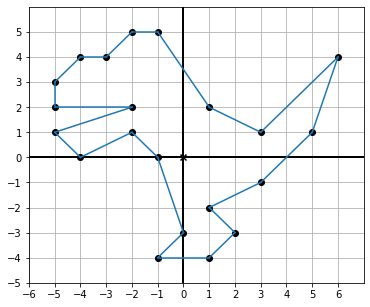

In [220]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

In [221]:
from draw3d import *

In [222]:
def polygon_segments_3d(points,color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i+1) % count], color=color) for i in range(0,count)]

In [223]:
dino_3d = [(x,y,1) for x,y in dino_vectors]

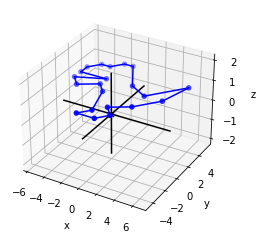

In [224]:
draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

In [225]:
magic_matrix = (
    (1,0,3),
    (0,1,1),
    (0,0,1)
)

In [226]:
translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]

In [236]:
d3D = translated
print(d3D)
c = len(d3D)
d2D = 

[(9, 5, 1), (6, 2, 1), (4, 3, 1), (2, 6, 1), (1, 6, 1), (0, 5, 1), (-1, 5, 1), (-2, 4, 1), (-2, 3, 1), (1, 3, 1), (-2, 2, 1), (-1, 1, 1), (1, 2, 1), (2, 1, 1), (3, -2, 1), (2, -3, 1), (4, -3, 1), (5, -2, 1), (4, -1, 1), (6, 0, 1), (8, 2, 1)]


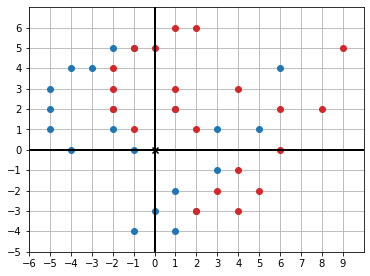

In [237]:
draw(
    Points(*dino_vectors, color=blue),
    Points(
        *[(translated[i][:2]) for i in range(0,len(translated))], 
        color=red
    )
)

In [238]:
def translate_3d(translation):
    def new_function(target):
        a,b,c = translation
        x,y,z = target
        matrix = (
            (1,0,0,a),
            (0,1,0,b),
            (0,0,1,c),
            (0,0,0,1)
        )
        vector = (x,y,z,1)
        x_out, y_out, z_out, _ = multiply_matrix_vector(matrix, vector)
        return (x_out, y_out, z_out)
    return new_function